<a href="https://colab.research.google.com/github/nguyenhieuec/Course_18_065/blob/master/Facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount("/content/gdrive")
path = "/content/gdrive/My Drive/Colab Notebooks"
os.chdir(path) #succeed
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
'advanced stat 30 10 2019.ipynb'
'advanced stat Metropolis Hasting method.ipynb'
'Bayes inference.ipynb'
'Bert sentiment stock.ipynb'
'Copy of 00_notebook_tutorial.ipynb'
'Copy of Algo-backtesting-zipline.ipynb'
'Copy of Algotrading_Datasources.ipynb'
'Copy of Algotrading_Processing Data.ipynb'
'Copy of Cgan_mnist.ipynb'
'Copy of Detectron2 Tutorial.ipynb'
'Copy of em_assignment.ipynb'
'Copy of gp_assignment.ipynb'
'Copy of mcmc_assignment.ipynb'
'Copy of TP1

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 100kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=cb2f5f61f1e81f8e6dddbaf70b183cc989ee32f992667dab9067ef7cccf71fe2
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
!pwd 

/content/gdrive/My Drive/Colab Notebooks


In [4]:
!git clone https://github.com/phamdinhkhanh/FacenetDataset.git ./Dataset

fatal: destination path './Dataset' already exists and is not an empty directory.


In [5]:
!git clone https://github.com/phamdinhkhanh/khanhBlogTurtorial.git ./model

fatal: destination path './model' already exists and is not an empty directory.


In [6]:
!ls

'advanced stat 30 10 2019.ipynb'
'advanced stat Metropolis Hasting method.ipynb'
'Bayes inference.ipynb'
'Bert sentiment stock.ipynb'
'Copy of 00_notebook_tutorial.ipynb'
'Copy of Algo-backtesting-zipline.ipynb'
'Copy of Algotrading_Datasources.ipynb'
'Copy of Algotrading_Processing Data.ipynb'
'Copy of Cgan_mnist.ipynb'
'Copy of Detectron2 Tutorial.ipynb'
'Copy of em_assignment.ipynb'
'Copy of gp_assignment.ipynb'
'Copy of mcmc_assignment.ipynb'
'Copy of TP1Jvn.ipynb'
'Copy of working Ch1_Introduction_TFP (1).ipynb'
'Copy of working Ch1_Introduction_TFP.ipynb'
'--- Crawl content from urls.ipynb'
'Crawl content from urls.ipynb'
 Dataset
 embed_blob_faces.pkl
 E-Q1633_R-63911_NguyenVuTrungHieu_ver1.ipynb
 faces.pkl
 from_darknet.ipynb
'Gibbs sampling 30 10 2019.ipynb'
'Greedy algorithm in trading .ipynb'
'Hieu Nguyen - Assignment 02: Unsupervised Learning.ipynb'
 hieunguyen_qcf_2018_TP1JVN.ipynb
 hieunguyen_qcf_2018_TP2JVN
 id_test.pkl
 id_train.pkl
 images_file.pkl
 JKA_F.ipynb
 JKA.ip

In [0]:
# Hàm load model
## Load model từ Caffe
import cv2
import os
import numpy as np


EMBEDDING_FL = "/content/gdrive/My Drive/Colab Notebooks/model/facenet/nn4.small2.v1.t7"
DATASET_PATH = "/content/gdrive/My Drive/Colab Notebooks/Dataset"

def _load_torch(model_path_fl):
  """
  model_path_fl: Link file chứa weigth của model
  """
  model = cv2.dnn.readNetFromTorch(model_path_fl)
  return model

In [0]:
encoder = _load_torch(EMBEDDING_FL)

In [0]:
import cv2

def _blobImage(image, out_size = (300, 300), scaleFactor = 1.0, mean = (104.0, 177.0, 123.0)):
  """
  input:
    image: ma trận RGB của ảnh input
    out_size: kích thước ảnh blob
  return:
    imageBlob: ảnh blob
  """
  # Chuyển sang blobImage để tránh ảnh bị nhiễu sáng
  imageBlob = cv2.dnn.blobFromImage(image, 
                                    scalefactor=scaleFactor,   # Scale image
                                    size=out_size,  # Output shape
                                    mean=mean,  # Trung bình kênh theo RGB
                                    swapRB=False,  # Trường hợp ảnh là BGR thì set bằng True để chuyển qua RGB
                                    crop=False)
  return imageBlob

In [0]:
from face_recognition import face_locations
import matplotlib.pyplot as plt

IMAGE_TEST = os.path.join(path, "Dataset/khanh/001.jpg")

def _image_read(image_path):
  """
  input:
    image_path: link file ảnh
  return:
    image: numpy array của ảnh
  """
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image


image = _image_read(IMAGE_TEST)

def _extract_bbox(image, single = True):
  """
  Trích xuất ra tọa độ của face từ ảnh input
  input:
    image: ảnh input theo kênh RGB. 
    single: Lấy ra 1 face trên 1 bức ảnh nếu True hoặc nhiều faces nếu False. Mặc định True.
  return:
    bbox: Tọa độ của bbox: <start_Y>, <start_X>, <end_Y>, <end_X>
  """
  bboxs = face_locations(image)
  if len(bboxs)==0:
    return None
  if single:
    bbox = bboxs[0]
    return bbox
  else:
    return bboxs

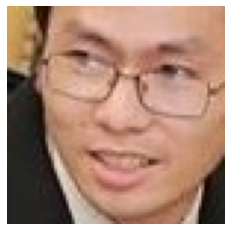

In [11]:
def _extract_face(image, bbox, face_scale_thres = (20, 20)):
  """
  input:
    image: ma trận RGB ảnh đầu vào
    bbox: tọa độ của ảnh input
    face_scale_thres: ngưỡng kích thước (h, w) của face. Nếu nhỏ hơn ngưỡng này thì loại bỏ face
  return:
    face: ma trận RGB ảnh khuôn mặt được trích xuất từ image input.
  """
  h, w = image.shape[:2]
  try:
    (startY, startX, endY, endX) = bbox
  except:
    return None
  minX, maxX = min(startX, endX), max(startX, endX)
  minY, maxY = min(startY, endY), max(startY, endY)
  face = image[minY:maxY, minX:maxX].copy()
  # extract the face ROI and grab the ROI dimensions
  (fH, fW) = face.shape[:2]

  # ensure the face width and height are sufficiently large
  if fW < face_scale_thres[0] or fH < face_scale_thres[1]:
    return None
  else:
    return face

bbox = _extract_bbox(image)
face = _extract_face(image, bbox)
plt.axis("off")
plt.imshow(face)

In [12]:
from imutils import paths
DATASET_PATH = "./Dataset"

def _model_processing(face_scale_thres = (20, 20)):
  """
  face_scale_thres: Ngưỡng (W, H) để chấp nhận một khuôn mặt.
  """
  image_links = list(paths.list_images(DATASET_PATH))
  images_file = [] 
  y_labels = []
  faces = []
  total = 0
  for image_link in image_links:
    split_img_links = image_link.split("/")
    # Lấy nhãn của ảnh
    name = split_img_links[-2] 
    # Đọc ảnh
    image = _image_read(image_link)
    (h, w) = image.shape[:2]
    # Detect vị trí các khuôn mặt trên ảnh. Gỉa định rằng mỗi bức ảnh chỉ có duy nhất 1 khuôn mặt của chủ nhân classes.
    bbox =_extract_bbox(image, single=True)
    # print(bbox_ratio)
    if bbox is not None:
      # Lấy ra face
      face = _extract_face(image, bbox, face_scale_thres = (20, 20))
      if face is not None:
        faces.append(face)
        y_labels.append(name)
        images_file.append(image_links)
        total += 1
      else:
        next
  print("Total bbox face extracted: {}".format(total))
  return faces, y_labels, images_file

faces, y_labels, images_file = _model_processing()

Total bbox face extracted: 142


In [0]:
import pickle

def _save_pickle(obj, file_path):
  with open(file_path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pickle(file_path):
  with open(file_path, 'rb') as f:
    obj = pickle.load(f)
  return obj

_save_pickle(faces, "./faces.pkl")
_save_pickle(y_labels, "./y_labels.pkl")
_save_pickle(images_file, "./images_file.pkl")

In [0]:
def _embedding_faces(encoder, faces):
  emb_vecs = []
  for face in faces:
    faceBlob = _blobImage(face, out_size = (96, 96), scaleFactor=1/255.0, mean=(0, 0, 0))
    # Embedding face
    encoder.setInput(faceBlob)
    vec = encoder.forward()
    emb_vecs.append(vec)
  return emb_vecs

embed_faces = _embedding_faces(encoder, faces)
# Nhớ save embed_faces vào Dataset.
_save_pickle(embed_faces, "./embed_blob_faces.pkl")

In [0]:
embed_faces = _load_pickle("./embed_blob_faces.pkl")
y_labels = _load_pickle("./y_labels.pkl")

In [16]:
from sklearn.model_selection import train_test_split
ids = np.arange(len(y_labels))

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(np.stack(embed_faces), y_labels, ids, test_size = 0.2, stratify = y_labels)
X_train = np.squeeze(X_train, axis = 1)
X_test = np.squeeze(X_test, axis = 1)
print(X_train.shape, X_test.shape)
print(len(y_train), len(y_test))

(113, 128) (29, 128)
113 29


In [0]:
_save_pickle(id_train, "./id_train.pkl")
_save_pickle(id_test, "./id_test.pkl")

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

def _most_similarity(embed_vecs, vec, labels):
  sim = cosine_similarity(embed_vecs, vec)
  sim = np.squeeze(sim, axis = 1)
  argmax = np.argsort(sim)[::-1][:1]
  label = [labels[idx] for idx in argmax][0]
  return label

# Lấy ngẫu nhiên một bức ảnh trong test
vec = X_test[1].reshape(1, -1)
# Tìm kiếm ảnh gần nhất
_most_similarity(X_train, vec, y_train)

'sontung'

In [19]:
# def _acc_test(test_set, y_test):
from sklearn.metrics import accuracy_score

y_preds = []
for vec in X_test:
  vec = vec.reshape(1, -1)
  y_pred = _most_similarity(X_train, vec, y_train)
  y_preds.append(y_pred)

print(accuracy_score(y_preds, y_test))

0.5172413793103449


In [0]:
%tensorflow_version 2.x

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

def _base_network():
  model = VGG16(include_top = True, weights = None)
  dense = Dense(128)(model.layers[-4].output)
  norm2 = Lambda(lambda x: tf.math.l2_normalize(x, axis = 1))(dense)
  model = Model(inputs = [model.input], outputs = [norm2])
  return model

model = _base_network()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
faces = _load_pickle("./faces.pkl")

In [23]:
import cv2

faceResizes = []
for face in faces:
  face_rz = cv2.resize(face, (224, 224))
  faceResizes.append(face_rz)

X = np.stack(faceResizes)
X.shape

(142, 224, 224, 3)

In [24]:
id_train = _load_pickle("./id_train.pkl")
id_test = _load_pickle("./id_test.pkl")

X_train, X_test = X[id_train], X[id_test]

print(X_train.shape)
print(X_test.shape)

(113, 224, 224, 3)
(29, 224, 224, 3)


In [0]:
import tensorflow_addons as tfa

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss())

In [26]:
print(X_train.shape, len(y_train))

gen_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).repeat().shuffle(1024).batch(32)
gen_train

(113, 224, 224, 3) 113


<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.uint8, tf.string)>

In [0]:
history = model.fit(
    gen_train,
    steps_per_epoch = 50,
    epochs=10)

Epoch 1/10


In [0]:
X_train_vec = model.predict(X_train)
X_test_vec = model.predict(X_test)

In [0]:
y_preds = []
for vec in X_test_vec:
  vec = vec.reshape(1, -1)
  y_pred = _most_similarity(X_train_vec, vec, y_train)
  y_preds.append(y_pred)

print(accuracy_score(y_preds, y_test))

In [0]:
idx_diff = np.flatnonzero(np.array(y_preds) != np.array(y_test))

fg, ax = plt.subplots(2, 5, figsize=(15, 8))
fg.suptitle('Wrong predict images')

for i in np.arange(2):
  for j in np.arange(5):
    ax[i, j].imshow(X_test[idx_diff[i + j + j*i]])
    ax[i, j].set_xlabel('Transform '+str(i+j+j*i))
    ax[i, j].axis('off')

In [0]:
def _most_similarity_idx(embed_vecs, vec, labels):
  sim = cosine_similarity(embed_vecs, vec)
  sim = np.squeeze(sim, axis = 1)
  argmax = np.argsort(sim)[::-1][:1][0]
  # label = [labels[idx] for idx in argmax][0]
  return argmax

# Lấy ra các bức ảnh gần nhất với các ảnh dự báo.
nearest_idx = []
for vec in X_test_vec:
  vec = vec.reshape(1, -1)
  argmax = _most_similarity_idx(X_train_vec, vec, y_train)
  nearest_idx.append(argmax)

# Lọc ra tiếp các ảnh bị dự báo sai.
nearest_idx = [nearest_idx[idx] for idx in idx_diff]

In [0]:
fg, ax = plt.subplots(2, 5, figsize=(15, 8))
fg.suptitle('Nearest predict images')

for i in np.arange(2):
  for j in np.arange(5):
    ax[i, j].imshow(X_train[nearest_idx[i + j + j*i]])
    ax[i, j].set_xlabel('Transform '+str(i+j+j*i))
    ax[i, j].axis('off')

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

In [0]:
no_batch = 0
X_au = []
y_au = []
for i in np.arange(len(X_train)):
  no_img = 0
  for x in datagen.flow(np.expand_dims(X_train[i], axis = 0), batch_size = 1):
    X_au.append(x[0])
    y_au.append(y_train[i])
    no_img += 1
    if no_img == 5:
      break

In [0]:
import tensorflow_addons as tfa
model2 = _base_network()

model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss())

In [0]:
# Điều chỉnh tăng batch_size = 64
gen_train2 = tf.data.Dataset.from_tensor_slices((X_au, y_au)).repeat().shuffle(1024).batch(64)
gen_train2

In [0]:
print(len(X_au), len(y_au))

In [0]:
history = model2.fit(
    gen_train2,
    steps_per_epoch = 50,
    epochs=20)

In [0]:
data_tf = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    horizontal_flip=True
    )

data_tf.fit(X_test)

no_batch = 0
X_test_tf = []
for i in np.arange(len(X_test)):
  no_img = 0
  for x in data_tf.flow(np.expand_dims(X_test[i], axis = 0), batch_size = 1):
    X_test_tf.append(x[0])
    no_img += 1
    if no_img == 1:
      break

In [0]:
X_train_vec = model2.predict(np.stack(X_au))
X_test_vec = model2.predict(np.stack(X_test_tf))

In [0]:
y_preds = []
for vec in X_test_vec:
  vec = vec.reshape(1, -1)
  y_pred = _most_similarity(X_train_vec, vec, y_au)
  y_preds.append(y_pred)

print(accuracy_score(y_preds, y_test))

In [0]:
def _normalize_image(image, epsilon=0.000001):
  means = np.mean(image.reshape(-1, 3), axis=0)
  stds = np.std(image.reshape(-1, 3), axis=0)
  image_norm = image - means
  image_norm = image_norm/(stds + epsilon)
  return image_norm

In [0]:
IMAGE_OUTPUT = "./predictions.jpg"
IMAGE_PREDICT = "./test1.jpg"

# Trích xuất bbox image 
image = _image_read(IMAGE_PREDICT)
# imageBlob = _blobImage(image)
bboxs = _extract_bbox(image, single=False)
# print(len(bboxs))
faces = []
for bbox in bboxs:
  face = _extract_face(image, bbox, face_scale_thres = (20, 20))
  # face = face.copy()
  faces.append(face)
  try:
    face_rz = cv2.resize(face, (224, 224))
    # Chuẩn hóa ảnh bằng hàm _normalize_image
    face_tf = _normalize_image(face_rz)
    face_tf = np.expand_dims(face_tf, axis = 0)
    # Embedding face
    vec = model2.predict(face_tf)
    # Tìm kiếm ảnh gần nhất
    name = _most_similarity(X_train_vec, vec, y_au)
    # Tìm kiếm các bbox
    (startY, startX, endY, endX) = bbox
    minX, maxX = min(startX, endX), max(startX, endX)
    minY, maxY = min(startY, endY), max(startY, endY)
    pred_proba=0.891
    text = "{}: {:.2f}%".format(name, pred_proba * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(image, (minX, minY), (maxX, maxY), (0, 0, 255), 2)
    cv2.putText(image, text, (minX, y),
      cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
  except:
      print("Not found face")
cv2.imwrite(IMAGE_OUTPUT, image)


# import matplotlib.pyplot as plt

plt.figure(figsize = (16, 8))
img = plt.imread(IMAGE_OUTPUT)
plt.imshow(img)